## Temperature is maximum near the equator, decreases as you get further away from it.
## Largest Cluster of max humidity % (between 80-100%) at or near the equator.
## Windspeed ranges between 0-15mph near the equator, seems to increase as you get away from the equator.


In [1]:
# Dependencies

#for cities
from citipy import citipy

#for random numbers - used to get random lattitudes and longitudes
import random

#to get city weather
import openweathermapy.core as owm
import requests

#config
from config import api_key
#dataframe
import pandas as pd

#for scatter plotting
import matplotlib.pyplot as plt
#import numpy as np
#from scipy.stats import sem
import datetime
import seaborn as sns

In [2]:
#TESTING citypy
# Some random coordinates
coordinates = [(200, 200), (23, 200), (42, 100)]
#coordinates = [(500, 100), (10000, 200), (42, 100)]
city=citipy.nearest_city(200, 200)
print(f"the city is: {city}")
city = citipy.nearest_city(22.99, 120.21)
city.city_name

the city is: <citipy.citipy.City object at 0x00000268D3FBAA20>


'tainan'

In [3]:
#TESTING openweathermap and data frame creation
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
temp = []
humid = []
cloud = []
windspeed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city +"&units=imperial"
    #response = requests.get(query_url + city).json()
    response = requests.get(query_url)
    response_json = response.json()
    lat.append(response_json['coord']['lat'])
    temp.append(response_json['main']['temp'])
    humid.append(response_json['main']['humidity'])
    cloud.append(response_json['clouds']['all'])
    windspeed.append(response_json['wind']['speed'])


print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")
print(f"The humidty information received is: {humid}")
print(f"The cloudiness % information received is: {cloud}")
print(f"The windspeed information received is: {windspeed}")

# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp,
    "humid": humid,
    "cloud": cloud,
    "windspeed":windspeed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

The latitude information received is: [48.86, 51.51, 59.91, 39.91]
The temperature information received is: [78.8, 71.06, 60.8, 57.2]
The humidty information received is: [39, 60, 31, 71]
The cloudiness % information received is: [0, 0, 0, 90]
The windspeed information received is: [6.93, 12.75, 16.11, 13.42]


,city,cloud,humid,lat,temp,windspeed
0,Paris,0,39,48.86,78.80,6.93
1,London,0,60,51.51,71.06,12.75
2,Oslo,0,31,59.91,60.80,16.11
3,Beijing,90,71,39.91,57.20,13.42


In [4]:
#building up city list
#getting more than 500 as some cities don't have all the needed data
# set up lists to hold reponse info
cities = []
lat=[]
count=0
city=''
latnow=0
lonnow=0

#latnow=random.randint(-90,90)   

while count <= 600:

    latnow=round(random.uniform(-90,90),2)
    lonnow=round(random.uniform(-180,180),2)
    city=citipy.nearest_city(latnow, lonnow).city_name

    if ((city not in cities) & (city != '') & (latnow not in lat)):
        try:
            cities.append(city)
            count += 1
            lat.append(latnow)
            lat.sort()
        except exception:
            continue
        

print(f"final count is:{len(cities)}")
print(f"{cities}")        
#print(f"lat list is {lat}")

final count is:601
['ushuaia', 'punta arenas', 'mataura', 'hobart', 'hilo', 'cape town', 'butaritari', 'kyra', 'codrington', 'rikitea', 'mizdah', 'saint george', 'san quintin', 'busselton', 'cidreira', 'fortuna foothills', 'jamestown', 'taolanaro', 'nantucket', 'shenjiamen', 'tygda', 'norman wells', 'severo-kurilsk', 'albany', 'barrow', 'moindou', 'cherskiy', 'wulanhaote', 'ponta do sol', 'port alfred', 'victoria', 'nikolskoye', 'teguise', 'lagoa', 'port elizabeth', 'hermanus', 'chalmette', 'chilliwack', 'deputatskiy', 'georgetown', 'great yarmouth', 'nelson bay', 'esperance', 'mar del plata', 'bluff', 'zhumadian', 'svetlogorsk', 'provideniya', 'umzimvubu', 'tual', 'oussouye', 'preobrazheniye', 'qaanaaq', 'iqaluit', 'saskylakh', 'bredasdorp', 'olafsvik', 'lavrentiya', 'broome', 'vieques', 'san patricio', 'lebu', 'tasiilaq', 'moravsky krumlov', 'togur', 'longyearbyen', 'illoqqortoormiut', 'barentsburg', 'faanui', 'henties bay', 'attawapiskat', 'la ronge', 'chokurdakh', 'saleaula', 'bure

In [5]:
#testing openweathermap
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "london"

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city +"&units=imperial"

# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json['main']['temp']

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")
print(f"the temp is {weather_json['main']['temp']}")

The weather API responded with: {'coord': {'lon': -0.13, 'lat': 51.51}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 71.06, 'pressure': 1020, 'humidity': 60, 'temp_min': 64.4, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1524313200, 'sys': {'type': 1, 'id': 5091, 'message': 0.0053, 'country': 'GB', 'sunrise': 1524286282, 'sunset': 1524337679}, 'id': 2643743, 'name': 'London', 'cod': 200}.
the temp is 71.06


In [6]:
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}
url = "http://api.openweathermap.org/data/2.5/weather?"

#initializing lists and variaales
count=1

lat = []
temp = []
humid = []
cloud = []
windspeed = []
weathercities = []
country = []

#for loop to get city weather information
for city in cities:
    print(f"processing record {count} of set 1 | {city}")
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city +"&units=imperial"
    print(f"{query_url}")
    # Get weather data
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        lat.append(weather_json['coord']['lat'])
        temp.append(weather_json['main']['temp_max'])
        humid.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
    except Exception:
        continue    

#debug code
#     #print(f"The latitude information received is: {lat}")
#     print(f"The temperature information received is: {temp}")
#     print(f"The humidty information received is: {humid}")
#     print(f"The cloudiness % information received is: {cloud}")
#     print(f"The windspeed information received is: {windspeed}")
    
    weathercities.append(city)
    count+=1
    if count > 500:
        break

# create a data frame from cities, lat, and temp
weather_dict = {
    "city": weathercities,
    "Latitude": lat,
    "Max temp": temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Windspeed":windspeed,
    "Country":country
}
#weather_dict
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


processing record 1 of set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ushuaia&units=imperial
processing record 2 of set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta arenas&units=imperial
processing record 3 of set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mataura&units=imperial
processing record 4 of set 1 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hobart&units=imperial
processing record 5 of set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hilo&units=imperial
processing record 6 of set 1 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=cape town&units=imperial
processing record 7 of set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid

processing record 50 of set 1 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=iqaluit&units=imperial
processing record 51 of set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saskylakh&units=imperial
processing record 52 of set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bredasdorp&units=imperial
processing record 53 of set 1 | olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=olafsvik&units=imperial
processing record 53 of set 1 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lavrentiya&units=imperial
processing record 54 of set 1 | broome
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=broome&units=imperial
processing record 55 of set 1 | vieques
http://api.openweathermap.org/data/2.5

processing record 96 of set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=yellowknife&units=imperial
processing record 97 of set 1 | salinas
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=salinas&units=imperial
processing record 98 of set 1 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=namibe&units=imperial
processing record 99 of set 1 | port blair
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=port blair&units=imperial
processing record 100 of set 1 | malia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=malia&units=imperial
processing record 101 of set 1 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lorengau&units=imperial
processing record 102 of set 1 | touros
http://api.openweathermap.org/data/2.5/wea

processing record 145 of set 1 | birin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=birin&units=imperial
processing record 146 of set 1 | shiyan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=shiyan&units=imperial
processing record 147 of set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=saldanha&units=imperial
processing record 148 of set 1 | chabahar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chabahar&units=imperial
processing record 149 of set 1 | valle de allende
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=valle de allende&units=imperial
processing record 150 of set 1 | belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=belushya guba&units=imperial
processing record 150 of set 1 | atar
http://api.openweather

processing record 192 of set 1 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ancud&units=imperial
processing record 193 of set 1 | amapa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=amapa&units=imperial
processing record 194 of set 1 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=moose factory&units=imperial
processing record 195 of set 1 | jining
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=jining&units=imperial
processing record 196 of set 1 | chapais
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=chapais&units=imperial
processing record 197 of set 1 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kodiak&units=imperial
processing record 198 of set 1 | tsihombe
http://api.openweathermap.org/data/2.5/weather

processing record 242 of set 1 | finschhafen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=finschhafen&units=imperial
processing record 243 of set 1 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=vaitupu&units=imperial
processing record 243 of set 1 | roma
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=roma&units=imperial
processing record 244 of set 1 | kandrian
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kandrian&units=imperial
processing record 245 of set 1 | dongsheng
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=dongsheng&units=imperial
processing record 246 of set 1 | moses lake
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=moses lake&units=imperial
processing record 247 of set 1 | carutapera
http://api.openweathermap.org/

processing record 291 of set 1 | acarau
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=acarau&units=imperial
processing record 291 of set 1 | olot
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=olot&units=imperial
processing record 292 of set 1 | riyadh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=riyadh&units=imperial
processing record 293 of set 1 | padang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=padang&units=imperial
processing record 294 of set 1 | thies
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=thies&units=imperial
processing record 295 of set 1 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=tiksi&units=imperial
processing record 296 of set 1 | altay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f15

processing record 340 of set 1 | uruzgan
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=uruzgan&units=imperial
processing record 341 of set 1 | rungata
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rungata&units=imperial
processing record 341 of set 1 | assiniboia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=assiniboia&units=imperial
processing record 342 of set 1 | mackay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mackay&units=imperial
processing record 343 of set 1 | hobyo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=hobyo&units=imperial
processing record 344 of set 1 | buraydah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=buraydah&units=imperial
processing record 345 of set 1 | tecoanapa
http://api.openweathermap.org/data/2.5/weat

processing record 384 of set 1 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bambous virieux&units=imperial
processing record 385 of set 1 | constitucion
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=constitucion&units=imperial
processing record 386 of set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=ribeira grande&units=imperial
processing record 387 of set 1 | waycross
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=waycross&units=imperial
processing record 388 of set 1 | plouzane
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=plouzane&units=imperial
processing record 389 of set 1 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=palabuhanratu&units=imperial
processing record 389 of set 1 |

processing record 433 of set 1 | opuwo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=opuwo&units=imperial
processing record 434 of set 1 | sinnar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=sinnar&units=imperial
processing record 435 of set 1 | lar gerd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=lar gerd&units=imperial
processing record 435 of set 1 | bulawayo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=bulawayo&units=imperial
processing record 436 of set 1 | rudnyy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=rudnyy&units=imperial
processing record 437 of set 1 | newtyle
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=newtyle&units=imperial
processing record 438 of set 1 | urengoy
http://api.openweathermap.org/data/2.5/weather?appi

processing record 481 of set 1 | umm durman
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=umm durman&units=imperial
processing record 481 of set 1 | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=mount gambier&units=imperial
processing record 482 of set 1 | kommunisticheskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=kommunisticheskiy&units=imperial
processing record 483 of set 1 | orange
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=orange&units=imperial
processing record 484 of set 1 | merauke
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=merauke&units=imperial
processing record 485 of set 1 | nizhneangarsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&q=nizhneangarsk&units=imperial
processing record 486 of set 1 | matamor

,Cloudiness,Country,Humidity,Latitude,Max temp,Windspeed,city
0,40,AR,60,-54.81,42.80,4.70,ushuaia
1,75,CL,100,-53.16,39.20,11.41,punta arenas
2,92,NZ,77,-46.19,45.83,14.65,mataura
3,0,AU,93,-42.88,53.60,2.28,hobart
4,75,US,77,19.71,69.80,4.70,hilo


In [7]:
#saving city weather information to csv file
weather_data.to_csv("city_weather.csv")

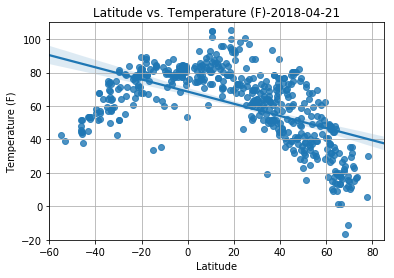

In [8]:
#plotting latitude vs. other criteria
#plt.scatter(weather_data["lat"],weather_data["temp"],marker=".",color="blue", edgecolors="face")
# use the function regplot to make a scatterplot 
# With regression fit:
sns_plot=sns.regplot(x=weather_data["Latitude"], y=weather_data["Max temp"], fit_reg=True)
# Incorporate the other graph properties
plt.title(f"Latitude vs. Temperature (F)-{datetime.datetime.now():%Y-%m-%d}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.ylim([-20,110])
plt.xlim([-60,85])

# Show plot
plt.show()
# Save an image of the chart and print to screen
#plt.savefig("Latitude_vs_Temperature.png")
#sns_plot = sns.pairplot(df, hue='species', size=2.5)
sns_plot.figure.savefig("Latitude_vs_Temperature.png")

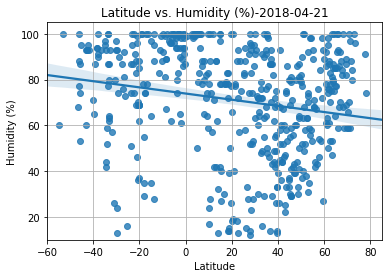

In [9]:
#plt.scatter(weather_data["lat"],weather_data["humid"],marker=".",color="blue", edgecolors="face")
# use the function regplot to make a scatterplot 
# With regression fit:
sns_plot=sns.regplot(x=weather_data["Latitude"], y=weather_data["Humidity"], fit_reg=True)
# Incorporate the other graph properties
plt.title(f"Latitude vs. Humidity (%)-{datetime.datetime.now():%Y-%m-%d}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim([10,105])
plt.xlim([-60,85])

# Show plot
plt.show()
# Save an image of the chart and print to screen
sns_plot.figure.savefig("Latitude_vs_Humidity.png")

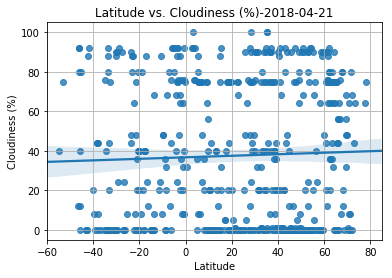

In [10]:
#plt.scatter(weather_data["lat"],weather_data["cloud"],marker=".",color="blue", edgecolors="face")
# use the function regplot to make a scatterplot 
# With regression fit:
sns_plot=sns.regplot(x=weather_data["Latitude"], y=weather_data["Cloudiness"], fit_reg=True)
# Incorporate the other graph properties
plt.title(f"Latitude vs. Cloudiness (%)-{datetime.datetime.now():%Y-%m-%d}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim([-5,105])
plt.xlim([-60,85])

# Show plot
plt.show()
# Save an image of the chart and print to screen
sns_plot.figure.savefig("Latitude_vs_Cloudiness.png")

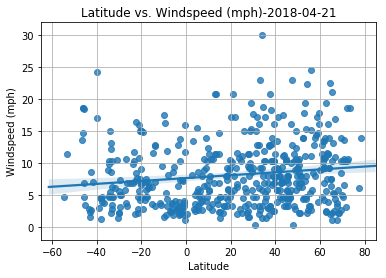

In [11]:
#plt.scatter(weather_data["lat"],weather_data["windspeed"],marker="D")
# use the function regplot to make a scatterplot 
# With regression fit:
sns_plot=sns.regplot(x=weather_data["Latitude"], y=weather_data["Windspeed"], fit_reg=True)
# Incorporate the other graph properties
plt.title(f"Latitude vs. Windspeed (mph)-{datetime.datetime.now():%Y-%m-%d}")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.ylim([-2,32])
plt.xlim([-65,85])

# Show plot
plt.show()
# Save an image of the chart and print to screen
sns_plot.figure.savefig("Latitude_vs_Windspeed.png")